<a href="https://colab.research.google.com/github/Sreerag-Pillai/Data_Science/blob/main/NeuralNetPredictionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Neural Network Curve Fitting

>  Creating a neural network (NN) that fits a curve to a given 2 data sets


In [ ]:
# importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import math

1.1 NN Implementation on Sunspot Data

1.11 Importing and Preprocessing the Data

In [ ]:
# Load the sunspot dataset
sunspots_data = pd.read_csv("/content/Problem1 - Sunspots.csv")

# Displaying  the data overview
print(sunspots_data.head())


   Unnamed: 0        Date  Monthly Mean Total Sunspot Number
0           0  1749-01-31                               96.7
1           1  1749-02-28                              104.3
2           2  1749-03-31                              116.7
3           3  1749-04-30                               92.8
4           4  1749-05-31                              141.7


In [ ]:
# Dropping Unnecessary Column 'Unnamed: 0'
sunspots_data_cleaned = sunspots_data.drop(columns=['Unnamed: 0'])
# Displaying  the data overview
print(sunspots_data_cleaned.head())

         Date  Monthly Mean Total Sunspot Number
0  1749-01-31                               96.7
1  1749-02-28                              104.3
2  1749-03-31                              116.7
3  1749-04-30                               92.8
4  1749-05-31                              141.7


In [ ]:
# Checking for missing values
print("null vlaues: \n",sunspots_data_cleaned.isnull().sum())

# Checking data types
print("\nData type: \n", sunspots_data_cleaned.dtypes)

null vlaues: 
 Date                                 0
Monthly Mean Total Sunspot Number    0
dtype: int64

Data type: 
 Date                                  object
Monthly Mean Total Sunspot Number    float64
dtype: object


In [ ]:
# Only extracting year, month from the date since data is a monthly average
sunspots_data_cleaned['Date'] = pd.to_datetime(sunspots_data_cleaned['Date'])
sunspots_data_cleaned['Year'] = sunspots_data_cleaned['Date'].dt.year
sunspots_data_cleaned['Month'] = sunspots_data_cleaned['Date'].dt.month

In [ ]:
# Normalize the sunspot numbers
sunspots_data_cleaned['Normalized Mean'] = (sunspots_data['Monthly Mean Total Sunspot Number'] - sunspots_data['Monthly Mean Total Sunspot Number'].mean()) / sunspots_data['Monthly Mean Total Sunspot Number'].std()

# Display the first few rows of the preprocessed dataset
sunspots_data_cleaned.head()

,Date,Monthly Mean Total Sunspot Number,Year,Month,Normalized Mean
0,1749-01-31,96.7,1749,1,0.219788
1,1749-02-28,104.3,1749,2,0.331735
2,1749-03-31,116.7,1749,3,0.514385
3,1749-04-30,92.8,1749,4,0.162341
4,1749-05-31,141.7,1749,5,0.882632


1.12 Creating NN and testing the data

In [ ]:
# Creating x_data as a fractional year
x_data_features = sunspots_data_cleaned[['Year', 'Month']]
y_data = sunspots_data_cleaned['Normalized Mean']

# Displaying the first few rows of x_data and y_data
x_data_features[:5], y_data.head()

(   Year  Month
 0  1749      1
 1  1749      2
 2  1749      3
 3  1749      4
 4  1749      5,
 0    0.219788
 1    0.331735
 2    0.514385
 3    0.162341
 4    0.882632
 Name: Normalized Mean, dtype: float64)

Part 1.12: Implementing the NN

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
x_train_features, x_test_features, y_train, y_test = train_test_split(x_data_features, y_data, test_size=0.2, random_state=42)

In [ ]:
# Create the model
sunspot_model = keras.Sequential([
    keras.layers.Dense(units=2, activation='relu', input_shape=(2,)),
    keras.layers.Dense(units=306, activation='sigmoid'),
    keras.layers.Dense(units=200, activation='sigmoid'),
    keras.layers.Dense(units=74, activation='relu'),
    keras.layers.Dense(units=1, activation='linear')
])

sunspot_model.compile(loss='mae', optimizer="adam")
# Display the model
sunspot_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 306)               918       
                                                                 
 dense_2 (Dense)             (None, 200)               61400     
                                                                 
 dense_3 (Dense)             (None, 74)                14874     
                                                                 
 dense_4 (Dense)             (None, 1)                 75        
                                                                 
Total params: 77,273
Trainable params: 77,273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model on the training data
sunspot_model.fit(x_train_features, y_train, epochs=1000, verbose=1)


Epoch 1/1000
82/82 [==============================] - 2s 4ms/step - loss: 0.8173
Epoch 2/1000
82/82 [==============================] - 0s 4ms/step - loss: 0.8071
Epoch 3/1000
82/82 [==============================] - 0s 4ms/step - loss: 0.8131
Epoch 4/1000
82/82 [==============================] - 0s 4ms/step - loss: 0.8020
Epoch 5/1000
82/82 [==============================] - 0s 4ms/step - loss: 0.8026
Epoch 6/1000
82/82 [==============================] - 0s 4ms/step - loss: 0.8040
Epoch 7/1000
82/82 [==============================] - 0s 5ms/step - loss: 0.8001
Epoch 8/1000
82/82 [==============================] - 1s 6ms/step - loss: 0.7994
Epoch 9/1000
82/82 [==============================] - 0s 6ms/step - loss: 0.7976
Epoch 10/1000
82/82 [==============================] - 1s 6ms/step - loss: 0.7994
Epoch 11/1000
82/82 [==============================] - 0s 6ms/step - loss: 0.7978
Epoch 12/1000
82/82 [==============================] - 1s 6ms/step - loss: 0.7996
Epoch 13/1000
82/82 [====

21/21 [==============================] - 0s 2ms/step


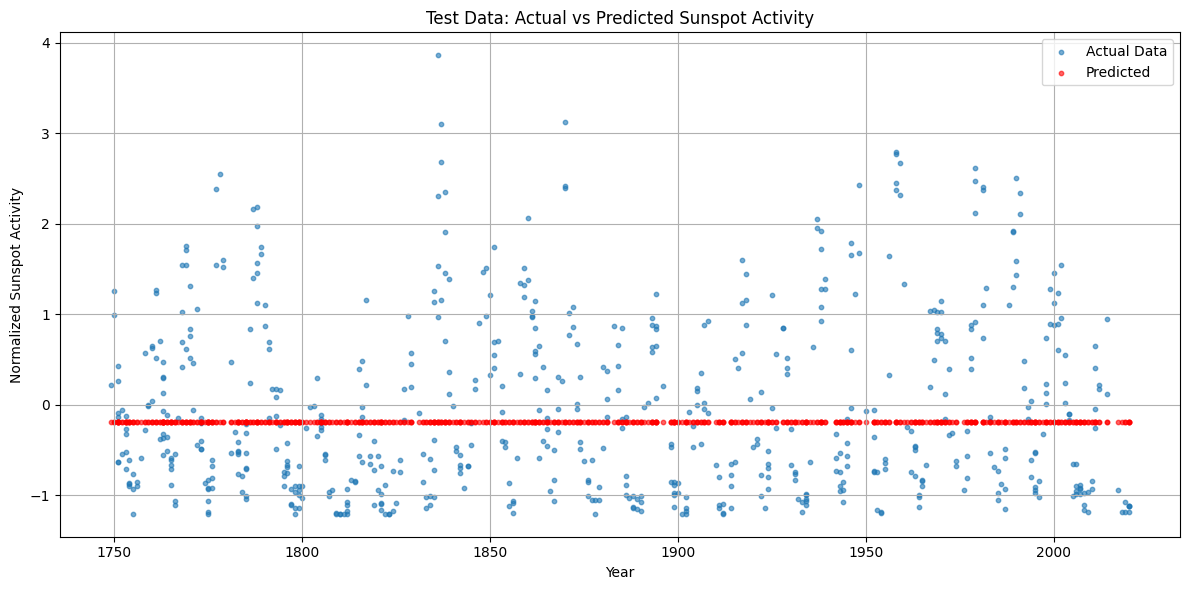

In [ ]:
# Predict sunspot activity using the trained model for train set
y_train_predicted = sunspot_model.predict(x_train_features)

# Predict sunspot activity using the trained model for test set
y_test_predicted = sunspot_model.predict(x_test_features)

# Extracting the 'Year' column for visualization
x_data_year_test = x_test_features['Year'].values

plt.figure(figsize=(12, 6))
plt.scatter(x_data_year_test, y_test, s=10, label='Actual Data', alpha=0.6)
plt.scatter(x_data_year_test, y_test_predicted, s=10, c='r', label='Predicted', alpha=0.6)
plt.title('Test Data: Actual vs Predicted Sunspot Activity')
plt.xlabel('Year')
plt.ylabel('Normalized Sunspot Activity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print("train_mae =", mean_absolute_error(y_train, y_train_predicted))
print("train_R_Sq =", r2_score(y_train, y_train_predicted))

print("test_mae =", mean_absolute_error(y_test, y_test_predicted))
print("test_R_Sq =", r2_score(y_test, y_test_predicted))


train_mae = 0.7966395831642304
train_R_Sq = -0.03744140738435009
test_mae = 0.7934161096565086
test_R_Sq = -0.0240641989414907


In [ ]:
# Create the model
sunspot_model = keras.Sequential([
    keras.layers.Dense(units=2, activation='relu', input_shape=(2,)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=1, activation='linear')
])
sunspot_model.compile(loss='mae', optimizer="adam")
# Display the model
sunspot_model.summary()
sunspot_model.fit(x_train_features, y_train, epochs=200, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
 dense_6 (Dense)             (None, 256)               768       
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 41,991
Trainable params: 41,991
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
82/82 [==============================]

21/21 [==============================] - 0s 2ms/step


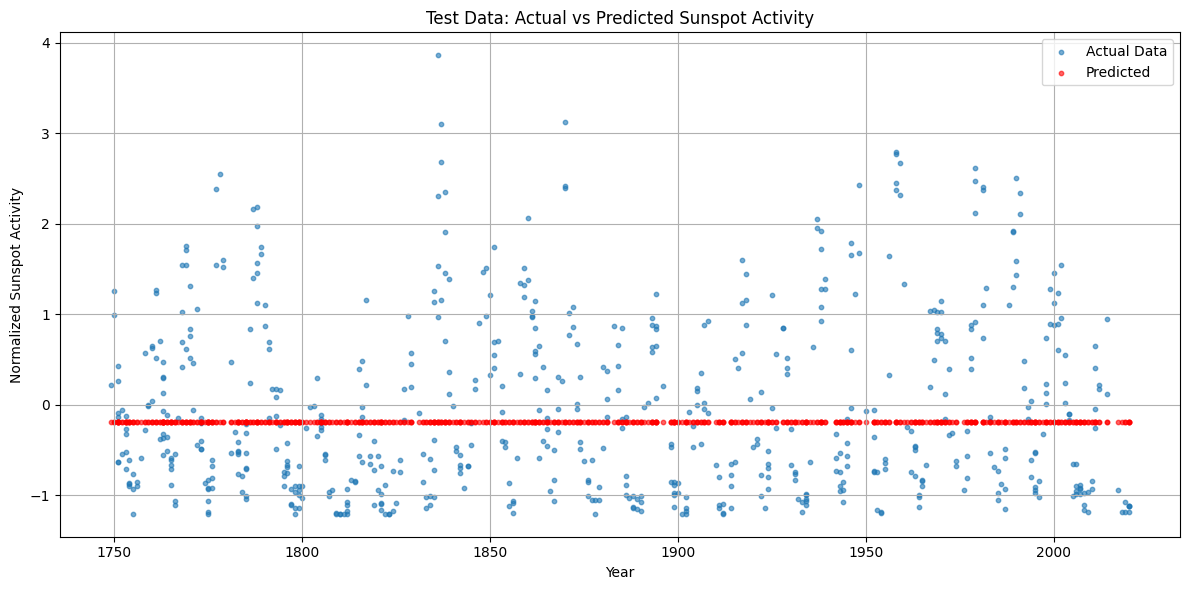

In [ ]:
# Predict sunspot activity using the trained model for train set
y_train_predicted = sunspot_model.predict(x_train_features)

# Predict sunspot activity using the trained model for test set
y_test_predicted = sunspot_model.predict(x_test_features)

# Extracting the 'Year' column for visualization
x_data_year_test = x_test_features['Year'].values

plt.figure(figsize=(12, 6))
plt.scatter(x_data_year_test, y_test, s=10, label='Actual Data', alpha=0.6)
plt.scatter(x_data_year_test, y_test_predicted, s=10, c='r', label='Predicted', alpha=0.6)
plt.title('Test Data: Actual vs Predicted Sunspot Activity')
plt.xlabel('Year')
plt.ylabel('Normalized Sunspot Activity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print("train_mae =", mean_absolute_error(y_train, y_train_predicted))
print("train_R_Sq =", r2_score(y_train, y_train_predicted))

print("test_mae =", mean_absolute_error(y_test, y_test_predicted))
print("test_R_Sq =", r2_score(y_test, y_test_predicted))


train_mae = 0.7966366407639272
train_R_Sq = -0.03986213239747549
test_mae = 0.7930093786736784
test_R_Sq = -0.026047345720182635
